# Utforsking av tidsrekke-data

Kilde til data:
http://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo

In [166]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [167]:
df = pd.read_csv("Data/monthly_in_situ_co2_mlo.csv",skiprows=55)

In [168]:
df.head(15)

,Yr,Mn,Date Excel,Date,CO2[ppm],seasonally adjusted[ppm],fit[ppm],seasonally adjusted fit[ppm],CO2 filled[ppm],seasonally adjusted filled[ppm]
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
5,1958,6,21351,1958.4548,-99.99,-99.99,317.24,315.14,317.24,315.14
6,1958,7,21381,1958.5370,315.86,315.18,315.87,315.22,315.86,315.18
7,1958,8,21412,1958.6219,314.93,316.18,314.00,315.29,314.93,316.18
8,1958,9,21443,1958.7068,313.20,316.08,312.45,315.35,313.20,316.08
9,1958,10,21473,1958.7890,-99.99,-99.99,312.43,315.41,312.43,315.41


In [169]:
df["Dato"] = df["Yr"].map(str) + "-" +df["Mn"].map(str) # Lager ny dato kolonne med format YYYY-MM
df.Dato = pd.to_datetime(df['Dato'], format='%Y-%m') # Bytter dato til pandas-datetime format
df.set_index(['Dato'],inplace=True) #Setter dato som index
df = df.rename({"CO2[ppm]": 'CO2'}, axis=1)  # Lager nytt navn for C02-konsentrasjon kolonne

In [170]:
df = df[["CO2"]] # Trenger bare disse

In [171]:
df.head(15)

,CO2
Dato,
1958-01-01,-99.99
1958-02-01,-99.99
1958-03-01,315.70
1958-04-01,317.45
1958-05-01,317.51
1958-06-01,-99.99
1958-07-01,315.86
1958-08-01,314.93
1958-09-01,313.20


In [172]:
def plot_df(df, x, y, title="", xlabel='Dato', ylabel='CO2[ppm]'):
    
    plt.figure(figsize=(16,8))
    plt.plot(x, y,linestyle="-")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

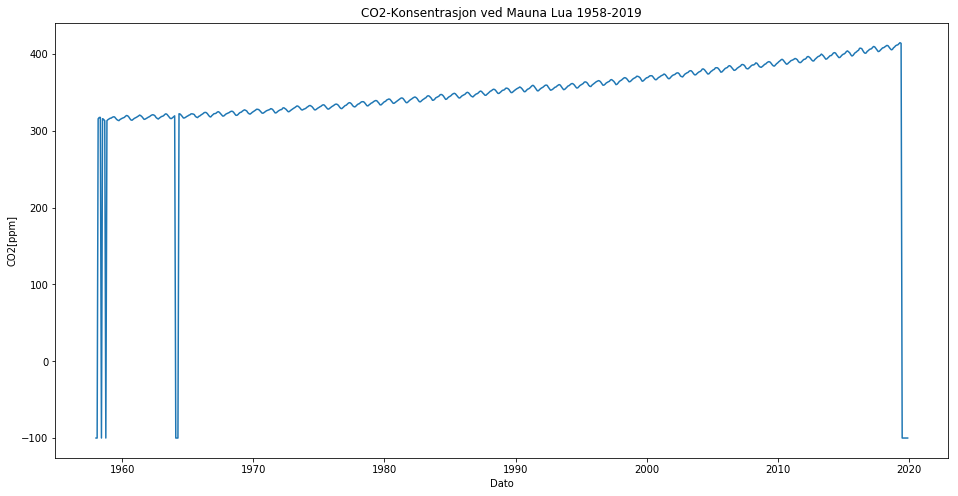

In [173]:
plot_df(df, x=df.index, y=df.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1958-2019') 

In [174]:
df = df[df.CO2 != -99.99]

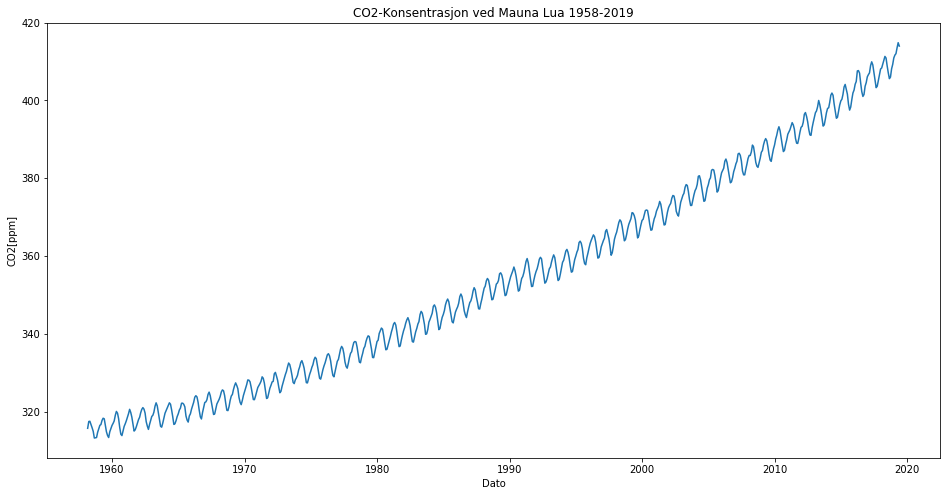

In [175]:
plot_df(df, x=df.index, y=df.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1958-2019') 